<a href="https://colab.research.google.com/github/Anu142004/Anu142004/blob/main/program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler



In [9]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
class_lobels=np.unique(y) # Pass the array 'y' to np.unique() to get the unique class labels.


In [10]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
class_lobels=np.unique(y) # Pass the array 'y' to np.unique() to get the unique class labels.

In [11]:
scaler=StandardScaler()
X_Standardized=scaler.fit_transform(x)

In [14]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
class_labels=np.unique(y) # Pass the array 'y' to np.unique() to get the unique class labels. Corrected the spelling from 'class_lobels' to 'class_labels'.
scaler=StandardScaler()
X_Standardized=scaler.fit_transform(x)
mean_vectors=[]
for cls in class_labels:
  mean_vectors.append(np.mean(X_Standardized[y==cls],axis=0))
S_W=np.zeros((x.shape[1],x.shape[1])) # Corrected 'np.zerors' to 'np.zeros'
for cls,mean_vec in zip(class_labels,mean_vectors): # Corrected 'mea_vectors' to 'mean_vectors'
  class_scatter=np.zeros((x.shape[1],x.shape[1]))
  for row in X_Standardized[y==cls]:
    row=row.reshape(-1,1)
    mean_vec=mean_vec.reshape(-1,1)
    class_scatter+=(row-mean_vec)@(row-mean_vec).T
  S_W+=class_scatter # Changed 'class_center' to 'class_scatter' as 'class_center' was not defined
overall_mean=np.mean(X_Standardized,axis=0)
overall_mean=overall_mean.reshape(-1,1) # Assigned the reshaped overall_mean to itself.


In [16]:
S_B=np.zeros((x.shape[1],x.shape[1]))
for cls,mean_vec in zip(class_labels,mean_vectors):
  n_cls=X_Standardized[y==cls].shape[0] # Use 'cls' instead of 'c[s]' to refer to the current class label.
  mean_vec=mean_vec.reshape(-1,1)

  S_B+=n_cls*(mean_vec-overall_mean)@(mean_vec-overall_mean).T

In [18]:
eigvals,eigvecs=np.linalg.eig(np.linalg.inv(S_W)@S_B)
sorted_indices=np.argsort(np.abs(eigvals))[::-1]
eigval=eigvals[sorted_indices]



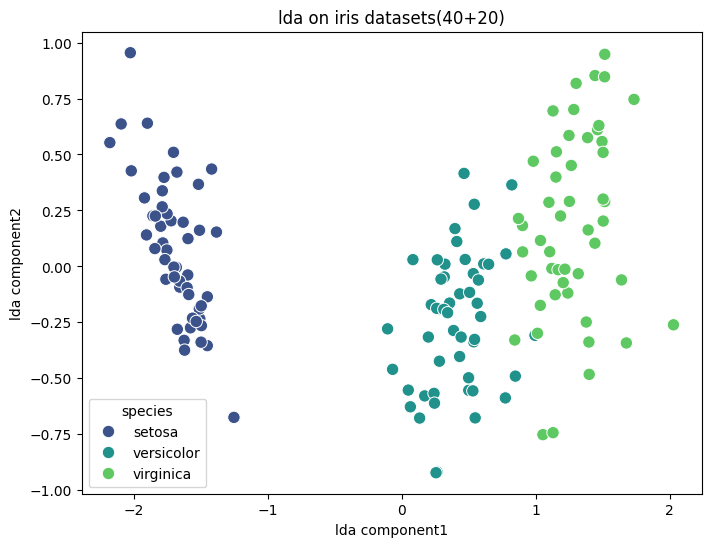

In [23]:
w_lda=eigvecs[:,:2]
x_lda=X_Standardized@w_lda
plt.figure(figsize=(8,6)) # Changed 'plt_figure' to 'plt.figure' and 'figure=' to 'figsize='
species_labels=[iris.target_names[label]for label in y]
sns.scatterplot(x=x_lda[:,0],y=x_lda[:,1],hue=species_labels,palette="viridis",s=80) # Changed 'viridies' to 'viridis'
plt.xlabel("lda component1")
plt.ylabel("lda component2")
plt.title("lda on iris datasets(40+20)") # Changed 'pl.tittle' to 'plt.title' for correct function name
plt.legend(title="species")
plt.show()

In [26]:
print("sorted egienvalues(variance explained):\n", eigvals)
print("top linear discrimination(W_lda:\n", w_lda) # Changed W_lda to w_lda

sorted egienvalues(variance explained):
 [3.21919292e+01 2.85391043e-01 1.61727787e-15 9.88360717e-16]
top linear discrimination(W_lda:
 [[-0.15128777  0.00693578]
 [-0.14733266  0.32786115]
 [ 0.85598541 -0.57170517]
 [ 0.47190474  0.75207191]]


In [3]:
import matplotlib.pyplot as plt